# Explore here

In [93]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error




region	price	year	manufacturer	model	condition	cylinders	fuel	odometer	transmission	drive	size	type	paint_color	description	state

In [94]:
#Cargar datos

#Dataset grande 1


#Dataset grande 1
df = pd.read_csv('../data/vehicles.csv', usecols=['region', 'price', 'year','manufacturer','model','condition','cylinders','fuel','odometer','transmission','drive','size','type','paint_color','description','state']) #cargar solo las columnas necesarias


#Dataset datos Ecuador - ignorar Ecuador
#df_ec=pd.read_csv('../data/patiotuerca2023-02-10.csv')

#Dataset 90000 cars 
#df_90k=pd.read_csv('../data/CarsData.csv')



In [95]:
#Explorar datos Dataset grande 1
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  description   426810 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [96]:
df.head()


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,description,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [97]:
df.drop(columns=['description','condition','type','region'],inplace=True) #elimine region para ver si tengo mas datos. 


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   size          120519 non-null  object 
 10  paint_color   296677 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


In [99]:
# Elimina todas las filas con valores nulos
df_cleaned = df.dropna()

# Muestra el número de filas antes y después de la limpieza
print(f"Filas antes de la limpieza: {len(df)}")
print(f"Filas después de la limpieza: {len(df_cleaned)}")

Filas antes de la limpieza: 426880
Filas después de la limpieza: 94711


In [100]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94711 entries, 31 to 426836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         94711 non-null  int64  
 1   year          94711 non-null  float64
 2   manufacturer  94711 non-null  object 
 3   model         94711 non-null  object 
 4   cylinders     94711 non-null  object 
 5   fuel          94711 non-null  object 
 6   odometer      94711 non-null  float64
 7   transmission  94711 non-null  object 
 8   drive         94711 non-null  object 
 9   size          94711 non-null  object 
 10  paint_color   94711 non-null  object 
 11  state         94711 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 9.4+ MB


In [101]:
df_cleaned.head()

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
31,15000,2013.0,ford,f-150 xlt,6 cylinders,gas,128000.0,automatic,rwd,full-size,black,al
55,19900,2004.0,ford,f250 super duty,8 cylinders,diesel,88000.0,automatic,4wd,full-size,blue,al
59,14000,2012.0,honda,odyssey,6 cylinders,gas,95000.0,automatic,fwd,full-size,silver,al
65,22500,2001.0,ford,f450,8 cylinders,diesel,144700.0,manual,rwd,full-size,white,al
73,15000,2017.0,dodge,charger rt 4dr sedan,8 cylinders,gas,90000.0,automatic,rwd,mid-size,grey,al


In [102]:
#cambiar floats a int
pd.set_option('display.max_columns', None)
df_cleaned['year'].fillna(0, inplace=True)
df_cleaned['year'] = df_cleaned['year'].astype(int)
df_cleaned['odometer'] = df_cleaned['odometer'].astype(int)
df_cleaned.sample(20)



C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\3109165968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['year'].fillna(0, inplace=True)
C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\3109165968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'].fillna(0, inplace=True)
C:\Users\Juan\AppData\Local\Temp\ip

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
32663,18900,2017,nissan,frontier,4 cylinders,gas,67888,automatic,rwd,full-size,white,ca
118757,36900,2017,ford,f-150,6 cylinders,gas,36361,automatic,rwd,full-size,black,fl
390472,6500,2002,toyota,tundra,6 cylinders,gas,157000,automatic,rwd,full-size,white,va
49649,36995,2020,ford,f-150,8 cylinders,gas,440,automatic,rwd,full-size,black,ca
291790,3500,2012,dodge,durango,8 cylinders,gas,150300,automatic,4wd,full-size,silver,oh
182103,10000,2011,bmw,328xi,6 cylinders,gas,114500,automatic,4wd,full-size,white,md
254235,7500,2013,volkswagen,jetta,4 cylinders,gas,128000,manual,fwd,compact,silver,nj
344428,6500,2004,bmw,330i conv,6 cylinders,gas,95000,automatic,rwd,mid-size,silver,sc
375056,3500,2007,chrysler,pacifica,8 cylinders,gas,117719,automatic,fwd,mid-size,silver,tx
50666,3000,1999,lincoln,town car limousine,8 cylinders,gas,140000,automatic,rwd,full-size,white,ca


In [103]:
# Assuming your DataFrame is named df
zero_price_listings = (df_cleaned['price'] == 0).sum()

# Print the result
print(f"Number of listings with a price of 0: {zero_price_listings}")

Number of listings with a price of 0: 5803


In [104]:
#Elimina listings con precio 0
df_cleaned = df_cleaned[df_cleaned['price'] != 0]

#Numero de filas despues del drop de listings con precio 0
print(f"Numero de filas despues de drop: {len(df_cleaned)}")

Numero de filas despues de drop: 88908


In [105]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 88908 entries, 31 to 426833
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         88908 non-null  int64 
 1   year          88908 non-null  int64 
 2   manufacturer  88908 non-null  object
 3   model         88908 non-null  object
 4   cylinders     88908 non-null  object
 5   fuel          88908 non-null  object
 6   odometer      88908 non-null  int64 
 7   transmission  88908 non-null  object
 8   drive         88908 non-null  object
 9   size          88908 non-null  object
 10  paint_color   88908 non-null  object
 11  state         88908 non-null  object
dtypes: int64(3), object(9)
memory usage: 8.8+ MB


In [106]:
df_cleaned.head()

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
31,15000,2013,ford,f-150 xlt,6 cylinders,gas,128000,automatic,rwd,full-size,black,al
55,19900,2004,ford,f250 super duty,8 cylinders,diesel,88000,automatic,4wd,full-size,blue,al
59,14000,2012,honda,odyssey,6 cylinders,gas,95000,automatic,fwd,full-size,silver,al
65,22500,2001,ford,f450,8 cylinders,diesel,144700,manual,rwd,full-size,white,al
73,15000,2017,dodge,charger rt 4dr sedan,8 cylinders,gas,90000,automatic,rwd,mid-size,grey,al


In [107]:
# Verificar datos duplicados
df_cleaned.duplicated().sum()
print(f"Numero de datos duplicados: {(df_cleaned.duplicated().sum())}")


Numero de datos duplicados: 16199


In [108]:
# Eliminar filas duplicadas

df_cleaned.drop_duplicates(inplace=True)
print(f"Numero de filas despues de eliminar duplicados: {len(df_cleaned)}")

Numero de filas despues de eliminar duplicados: 72709


In [109]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72709 entries, 31 to 426833
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         72709 non-null  int64 
 1   year          72709 non-null  int64 
 2   manufacturer  72709 non-null  object
 3   model         72709 non-null  object
 4   cylinders     72709 non-null  object
 5   fuel          72709 non-null  object
 6   odometer      72709 non-null  int64 
 7   transmission  72709 non-null  object
 8   drive         72709 non-null  object
 9   size          72709 non-null  object
 10  paint_color   72709 non-null  object
 11  state         72709 non-null  object
dtypes: int64(3), object(9)
memory usage: 7.2+ MB


In [110]:
#Rango de precios
min_price = df_cleaned['price'].min()
max_price = df_cleaned['price'].max()
print(f"Price Range: ${min_price} to ${max_price}\n")

#Rango de Años
min_year = df_cleaned['year'].min()
max_year = df_cleaned['year'].max()
print(f"Year Range: {min_year} to {max_year}\n")

#Tipos de Size
SizeUnique = df_cleaned['size'].unique()
print(f'Unique Sizes: {SizeUnique}')

print("/")

#Tipos de manufacturer
ManufacturerUnique = df_cleaned['manufacturer'].unique()
print(f'Unique Manufacturers: {ManufacturerUnique}')

print("/")

#Tipos de Cylinders
CylindersUnique = df_cleaned['cylinders'].unique()
print(f'Unique Cylinders: {CylindersUnique}')

print("/")

#Tipos de Fuel
FuelUnique = df_cleaned['fuel'].unique()
print(f'Unique Fuel Types: {FuelUnique}')

print("/")

#Rango de Odometer
min_odometer = df_cleaned['odometer'].min()
max_odometer = df_cleaned['odometer'].max()
print(f"Odometer Range: {min_odometer} to {max_odometer}\n")

print("/")

#Tipos de Transmission
TransmissionUnique = df_cleaned['transmission'].unique()
print(f'Unique Transmissions: {TransmissionUnique}')  

print("/")

#Tipos de Drive
DriveUnique = df_cleaned['drive'].unique()
print(f'Unique Drives: {DriveUnique}')

print("/")

#Tipos de Paint Color
PaintColorUnique = df_cleaned['paint_color'].unique()  
print(f'Unique Paint Colors: {PaintColorUnique}')

print("/")

#Tipos de State
StateUnique = df_cleaned['state'].unique()
print(f'Unique States: {StateUnique}')  




Price Range: $1 to $3736928711

Year Range: 1900 to 2022

Unique Sizes: ['full-size' 'mid-size' 'compact' 'sub-compact']
/
Unique Manufacturers: ['ford' 'honda' 'dodge' 'chrysler' 'toyota' 'jeep' 'lexus' 'chevrolet'
 'bmw' 'gmc' 'mercedes-benz' 'mazda' 'ram' 'nissan' 'ferrari' 'audi'
 'mitsubishi' 'infiniti' 'volkswagen' 'kia' 'pontiac' 'hyundai' 'fiat'
 'acura' 'cadillac' 'lincoln' 'jaguar' 'saturn' 'volvo' 'alfa-romeo'
 'buick' 'subaru' 'mini' 'mercury' 'rover' 'porsche' 'harley-davidson'
 'tesla' 'datsun' 'land rover' 'aston-martin']
/
Unique Cylinders: ['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
/
Unique Fuel Types: ['gas' 'diesel' 'hybrid' 'electric' 'other']
/
Odometer Range: 0 to 10000000

/
Unique Transmissions: ['automatic' 'manual' 'other']
/
Unique Drives: ['rwd' '4wd' 'fwd']
/
Unique Paint Colors: ['black' 'blue' 'silver' 'white' 'grey' 'yellow' 'red' 'green' 'brown'
 'purple' 'custom' 'orange']
/
Unique Sta

In [111]:
#Categorias Numericas
numerical_cats = ['price']

# Get descriptive statistics for these columns
print(df[numerical_cats].describe())


              price
count  4.268800e+05
mean   7.519903e+04
std    1.218228e+07
min    0.000000e+00
25%    5.900000e+03
50%    1.395000e+04
75%    2.648575e+04
max    3.736929e+09


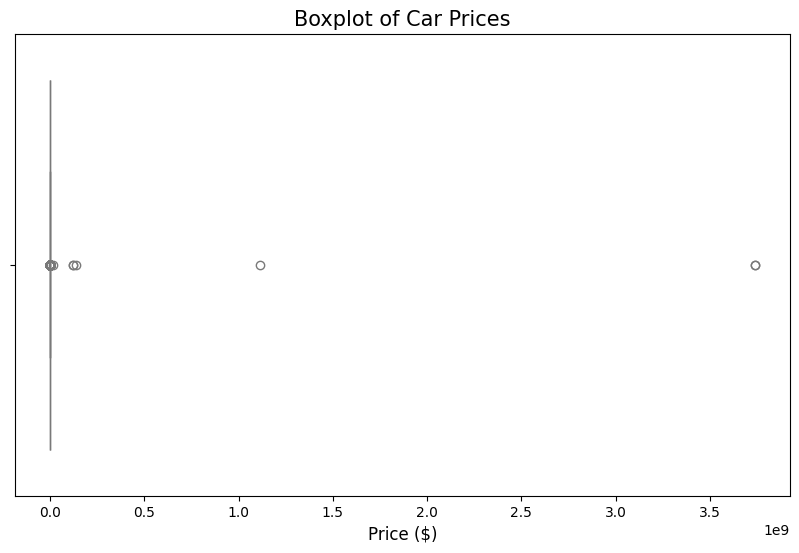

In [112]:
# Create a figure and an axes object
plt.figure(figsize=(10, 6))

# Generate the boxplot
# We use a horizontal orientation for better readability of the price scale
sns.boxplot(x=df_cleaned['price'], color='lightblue')

# Add titles and labels for clarity
plt.title('Boxplot of Car Prices', fontsize=15)
plt.xlabel('Price ($)', fontsize=12)

# Show the plot
plt.show()

Los outliers no me estan dejando ver la data correctamente

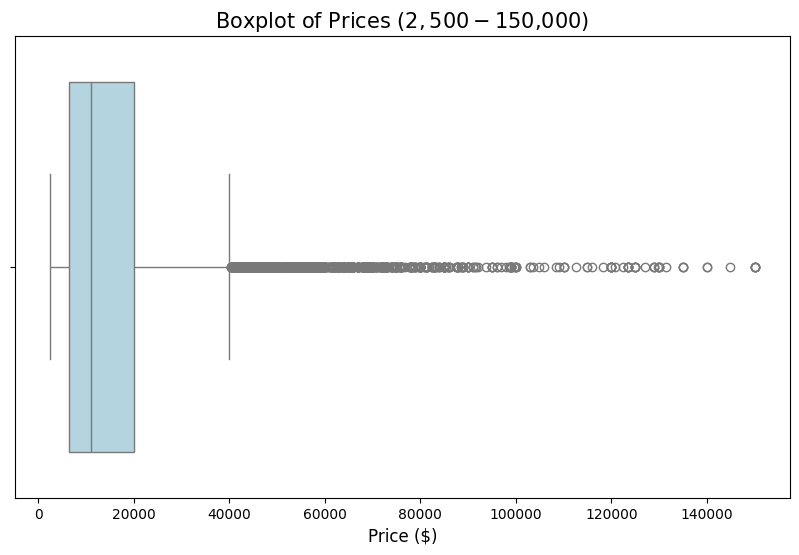

Number of listings in the $2,500 - $150,000 price range: 68376


In [113]:

df_filtered = df_cleaned[(df_cleaned['price'] >= 2500) & (df_cleaned['price'] <= 150000)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['price'], color='lightblue')
plt.title('Boxplot of Prices ($2,500 - $150,000)', fontsize=15)
plt.xlabel('Price ($)', fontsize=12)
plt.show()


count = df_filtered.shape[0]
print(f"Number of listings in the $2,500 - $150,000 price range: {count}")

In [114]:
%matplotlib inline

In [115]:
def plot_manufacturer_bar_chart(df_filtered):
    """
    Generates and displays a bar chart of the top 10 most frequent
    manufacturers.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    # 1. Count the occurrences of each manufacturer
    manufacturer_counts = df_filtered['manufacturer'].value_counts().head(10)

    # 2. Set up the plot area
    plt.figure(figsize=(10, 6))

    # 3. Create the bar chart using Seaborn
    sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette='viridis')

    # 4. Add titles and labels
    plt.title('Top 10 Most Frequent Car Manufacturers', fontsize=15)
    plt.xlabel('Manufacturer', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # 5. Rotate labels for readability
    plt.xticks(rotation=45, ha='right')
    
    # 6. Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\273604552.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette='viridis')


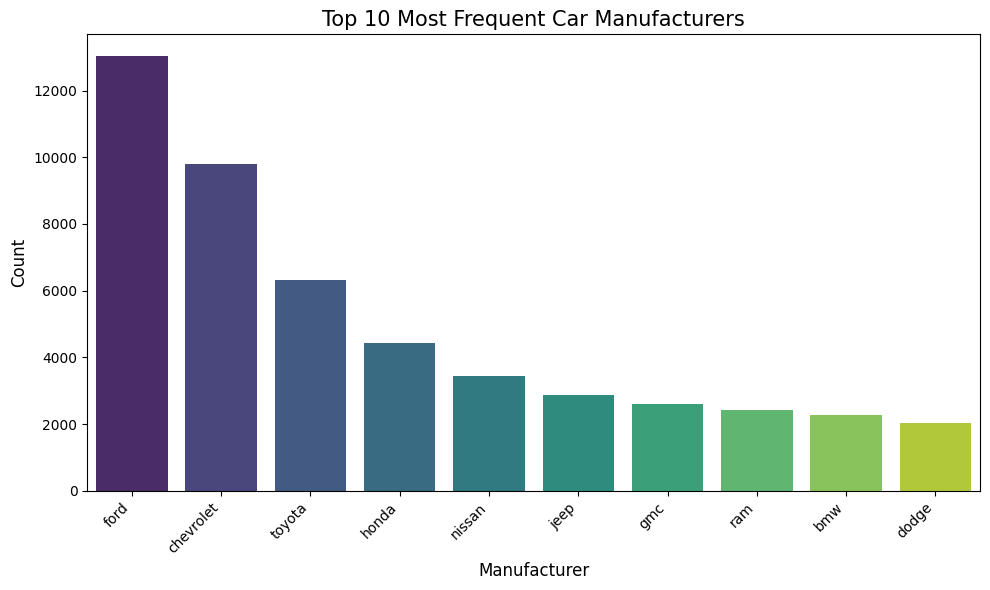

In [116]:
plot_manufacturer_bar_chart(df_filtered)


In [117]:
#funcion para juntar datasets  
#df['year']=df['year'].astype('int64')
#df_90k_p2=df_90k[['model','year','Manufacturer','engineSize','mpg']] / aca solo dejamos las columnas que nos interesan
#df_merged=pd.merge(df,df_90k_p2, how='left', left_on=['model','year','manufacturer'], right_on=['model','year','Manufacturer'])
#df_merged.head()

Revisamos Outliers.

In [118]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72709 entries, 31 to 426833
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         72709 non-null  int64 
 1   year          72709 non-null  int64 
 2   manufacturer  72709 non-null  object
 3   model         72709 non-null  object
 4   cylinders     72709 non-null  object
 5   fuel          72709 non-null  object
 6   odometer      72709 non-null  int64 
 7   transmission  72709 non-null  object
 8   drive         72709 non-null  object
 9   size          72709 non-null  object
 10  paint_color   72709 non-null  object
 11  state         72709 non-null  object
dtypes: int64(3), object(9)
memory usage: 7.2+ MB


In [119]:
df_cleaned['price'].describe().apply(lambda x: format(x, 'f'))


count         72709.000000
mean         137806.476557
std        20044063.426405
min               1.000000
25%            5750.000000
50%           10000.000000
75%           18996.000000
max      3736928711.000000
Name: price, dtype: object

In [120]:
#Vemos los precios mas altos 
df['price'].sort_values(ascending=False).head(15)

356716    3736928711
318592    3736928711
91576     3024942282
257840    3024942282
37410     3009548743
184704    1410065407
153082    1234567890
29386     1111111111
37409     1111111111
122470     987654321
280        987654321
230753     135008900
207080     123456789
137807     123456789
358555     123456789
Name: price, dtype: int64

In [121]:
df_cleaned.sort_values(by='price', ascending=False).head(15)

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
318592,3736928711,2007,toyota,tundra,8 cylinders,gas,164000,automatic,4wd,full-size,silver,or
356716,3736928711,1999,toyota,4runner,6 cylinders,gas,211000,automatic,4wd,mid-size,green,tn
29386,1111111111,1999,ford,f350 super duty lariat,8 cylinders,diesel,149000,automatic,rwd,full-size,white,ca
230753,135008900,2008,nissan,titan se kingcab,8 cylinders,gas,110500,automatic,4wd,full-size,grey,nc
307488,123456789,1996,gmc,sierra 2500,8 cylinders,gas,320000,automatic,4wd,full-size,black,ok
137807,123456789,1999,buick,regal,6 cylinders,gas,96000,automatic,fwd,full-size,white,id
136516,17000000,2007,ram,2500,8 cylinders,diesel,170000,automatic,4wd,full-size,black,id
68935,2000000,2002,saturn,l-series l200 4dr sedan,4 cylinders,gas,164290,automatic,fwd,mid-size,green,ca
155421,1234567,2006,jeep,wrangler,6 cylinders,gas,123456,automatic,4wd,mid-size,custom,in
219241,1111111,1970,dodge,challenger,8 cylinders,gas,42000,automatic,rwd,full-size,blue,ms


Aqui inspeccionamos los precios de los outliers con MAYOR precio, hay algunos que si tiene sentido que tengan unos preeicos pro encima de los $200.000 como los ferraris, sin embargo algunos como toyota tundra y toyota forruner que no son vehiculos de coleccion, no justifican precios de 

$3.000.000.000

es por esto que debemos analizar el los outliers por precio y hacer un filtrado por umbrales 

In [122]:
#Vemos los precios bajos

df_cleaned['price'].sort_values().head(15)

106375    1
92277     1
92278     1
92744     1
92806     1
92807     1
92808     1
92810     1
92814     1
92868     1
92870     1
358704    1
358713    1
358719    1
100710    1
Name: price, dtype: int64

In [123]:
df_cleaned.sort_values(by='price').head(15)

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
106375,1,2012,toyota,highlander,4 cylinders,gas,151329,automatic,fwd,full-size,silver,fl
92277,1,2018,dodge,charger,8 cylinders,gas,36000,other,4wd,compact,silver,fl
92278,1,2019,ford,mustang,8 cylinders,gas,8990,other,4wd,mid-size,green,fl
92744,1,2016,mercedes-benz,gla,10 cylinders,gas,32673,automatic,4wd,compact,white,fl
92806,1,2014,lexus,is 350,6 cylinders,gas,63312,other,4wd,compact,white,fl
92807,1,2019,audi,q8,6 cylinders,gas,3779,other,4wd,full-size,grey,fl
92808,1,2015,ford,f-150,6 cylinders,gas,69701,other,4wd,full-size,white,fl
92810,1,2019,ram,3500,10 cylinders,gas,31397,other,4wd,full-size,custom,fl
92814,1,2014,honda,accord sedan,4 cylinders,gas,48487,other,4wd,compact,grey,fl
92868,1,2017,ram,3500,6 cylinders,gas,59113,other,4wd,full-size,white,fl


In [124]:
#filtramos los precios
#df_cleaned_filtrado = df_cleaned[(df_cleaned['price'] > 2500) & (df['price'] < 200001)]

price_filter = (df_cleaned['price'] > 2500) & (df_cleaned['price'] < 200001)
top_10_manufacturers = df_cleaned['manufacturer'].value_counts().head(10).index.tolist()
manufacturer_filter = df_cleaned['manufacturer'].isin(top_10_manufacturers)

df_cleaned_filtrado = df_cleaned[price_filter]



Aqui hacemos el filtrado por precios, mayores a $99 y menores a $1.000.000

In [125]:
df_cleaned_filtrado.sort_values(by='price').head(15)

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
343065,2550,1992,mercedes-benz,sl500,8 cylinders,gas,78000,automatic,rwd,full-size,white,ri
251713,2550,2004,mitsubishi,endeavor,6 cylinders,gas,167098,automatic,fwd,mid-size,blue,nj
342062,2550,2000,ford,e450 bus,8 cylinders,diesel,204000,automatic,rwd,full-size,white,ri
44746,2550,2004,bmw,530i,6 cylinders,gas,268000,automatic,fwd,full-size,silver,ca
396119,2550,2008,chrysler,town & country,6 cylinders,gas,160,automatic,fwd,full-size,blue,va
396118,2550,2007,chrysler,town & country,6 cylinders,gas,130000,automatic,fwd,full-size,blue,va
233951,2550,2006,acura,rsx,4 cylinders,gas,184000,automatic,fwd,compact,black,nc
90038,2550,1997,ford,f-150,8 cylinders,gas,134526,automatic,rwd,full-size,blue,dc
249955,2550,2004,hyundai,elantra,4 cylinders,gas,76000,other,rwd,compact,black,nj
99652,2550,2001,chevrolet,tracker,4 cylinders,gas,123000,automatic,rwd,compact,black,fl


In [126]:
df_cleaned_filtrado.sort_values(by='price', ascending=False).head(15)

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
201823,195000,2017,subaru,wrx,4 cylinders,gas,73000,manual,4wd,full-size,grey,mi
104511,169999,2010,ferrari,458 italia,8 cylinders,gas,13000,automatic,rwd,full-size,yellow,fl
113503,165000,2018,dodge,srt demon,8 cylinders,gas,12,automatic,rwd,full-size,purple,fl
75900,164900,2020,mercedes-benz,revel,6 cylinders,diesel,26000,automatic,4wd,full-size,silver,co
323687,155000,2020,mercedes-benz,benz sprinter,6 cylinders,diesel,250,automatic,4wd,full-size,blue,or
41657,150000,1959,jaguar,xk 150,6 cylinders,gas,64765,manual,rwd,compact,white,ca
77020,150000,1959,jaguar,xk150 se dhc,6 cylinders,gas,64765,manual,rwd,compact,white,co
91502,150000,2009,ford,escape,4 cylinders,gas,182415,automatic,fwd,full-size,custom,de
363978,150000,1959,jaguar,xk150 se dhc,6 cylinders,gas,64765,manual,rwd,compact,white,tx
63153,150000,1959,jaguar,xk 150 se dhc,6 cylinders,gas,64765,manual,rwd,compact,white,ca


In [127]:
df_cleaned_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67638 entries, 31 to 426833
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         67638 non-null  int64 
 1   year          67638 non-null  int64 
 2   manufacturer  67638 non-null  object
 3   model         67638 non-null  object
 4   cylinders     67638 non-null  object
 5   fuel          67638 non-null  object
 6   odometer      67638 non-null  int64 
 7   transmission  67638 non-null  object
 8   drive         67638 non-null  object
 9   size          67638 non-null  object
 10  paint_color   67638 non-null  object
 11  state         67638 non-null  object
dtypes: int64(3), object(9)
memory usage: 6.7+ MB


EDA

In [128]:
num_cols = ['price', 'year', 'odometer']
df_cleaned_filtrado[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
price,67638.0,15127.043038,12310.138816,2550.0,6500.00,11000.0,19995.0,195000.0
year,67638.0,2008.865253,10.293838,1900.0,2006.00,2011.0,2015.0,2022.0
odometer,67638.0,115854.708670,186328.796609,0.0,65588.25,108000.0,150000.0,10000000.0


Aui podemos ver que el promedio de los vehiculos son del 2008 con un costo de 14.2k y con un kilometraje de 120k

Podemos notar que en el precio, años y kilometraje hay una gran desviacion estandar, pero tambien podemos notar que en el odoemtro hay vehicuklos con 10.000.000 de kilometros lo cual puede signifcar representar un error, investigamos eso a profundidad 



In [129]:
df_cleaned_filtrado.sort_values(by='odometer', ascending=False).head(40)

,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,paint_color,state
208157,9000,1975,chevrolet,monza 2+2,8 cylinders,gas,10000000,automatic,rwd,compact,red,mi
191629,7500,1970,chevrolet,chevelle,8 cylinders,gas,10000000,automatic,rwd,full-size,red,ma
81327,15000,1973,chevrolet,corvette,8 cylinders,gas,10000000,automatic,rwd,compact,silver,co
28738,20000,1951,chevrolet,coe,8 cylinders,gas,10000000,automatic,rwd,full-size,custom,ca
305172,4500,1995,chevrolet,impala ss 1995,8 cylinders,gas,10000000,automatic,rwd,full-size,custom,ok
262338,4800,1949,ford,f1,8 cylinders,gas,10000000,manual,rwd,full-size,blue,nm
44280,16000,1975,porsche,914,4 cylinders,gas,10000000,manual,rwd,sub-compact,red,ca
137937,3000,1979,chevrolet,caprice,8 cylinders,gas,9999999,automatic,rwd,full-size,black,id
378377,2700,2001,hyundai,accent,6 cylinders,gas,9999999,automatic,fwd,mid-size,silver,tx
217319,6500,1941,ford,coe,8 cylinders,gas,9999999,manual,rwd,full-size,black,mn


Aqui podemos ver que hay varios vehiculos que tienen kilometrajes excesivamente altos, algunos tienen sentido porque son vehiculos de hace mas de 40 años, sin embargo hay algunos que son vehiculos de principis de siglos y es muy didficl que tengan estos altos kilometrajes.

Debemos decidir que hacer con esos datos

Creo que los datos como precio y año tienen disperciones mas normales mientras que odometro 

In [130]:
cat_cols = ['manufacturer','model','cylinders','fuel','transmission','drive',
            'size','paint_color','state']

# Cardinalidad
{c: df_cleaned_filtrado[c].nunique() for c in cat_cols}

# Top categorías
for c in cat_cols:
    print(f"\n== {c} ==")
    print(df_cleaned_filtrado[c].value_counts().head(10))



== manufacturer ==
manufacturer
ford         12893
chevrolet     9694
toyota        6260
honda         4372
nissan        3423
jeep          2831
gmc           2593
ram           2396
bmw           2242
dodge         1998
Name: count, dtype: int64

== model ==
model
f-150             1417
silverado 1500    1109
accord             643
1500               639
camry              616
civic              610
silverado          571
tacoma             539
escape             492
altima             430
Name: count, dtype: int64

== cylinders ==
cylinders
4 cylinders     23628
6 cylinders     22673
8 cylinders     19865
5 cylinders       592
10 cylinders      469
other             220
3 cylinders       152
12 cylinders       39
Name: count, dtype: int64

== fuel ==
fuel
gas         62204
diesel       4243
hybrid        916
other         162
electric      113
Name: count, dtype: int64

== transmission ==
transmission
automatic    62314
manual        4997
other          327
Name: count, dtype: int6

Este punto es para observar los items con mayor predominancia en el set de datos

Aqui podemos ver las marcas y modelos mas predominanrtes siendo la ford f-150

Entendemos que es un set de data de estados unidos, con la mayor entrada de datos siendo California

Tambien podemos ver que la mayoria de los vehiculos son a gasolina

Esto lo hacemos con la finalidad de entender si el set de datos tiene algun sesgo 


In [131]:
df_cleaned_filtrado.isna().mean().sort_values(ascending=False)

# Duplicados exactos de fila
dup_rows = df_cleaned_filtrado.duplicated().sum()
dup_rows


np.int64(0)

Aqui vemos que no tenemos datos duplicados

Ahora vamos a investigar forma en la que se distribuyen las variables clave

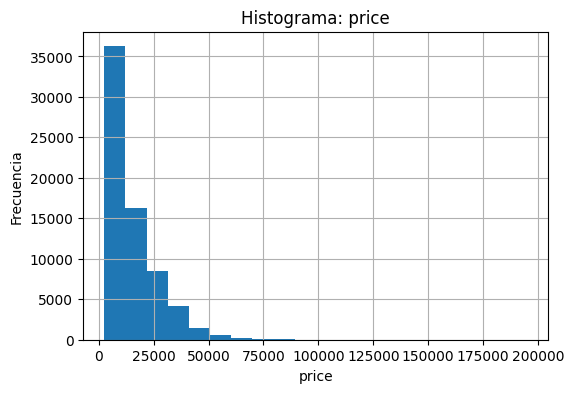

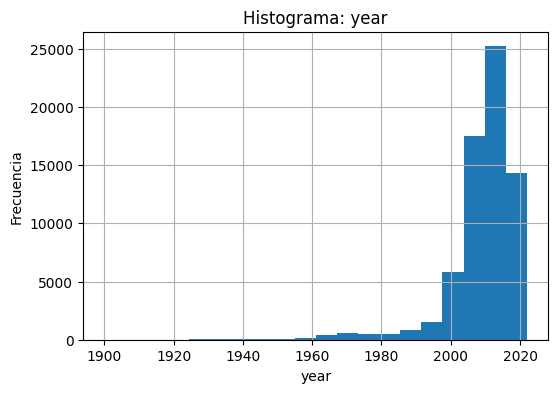

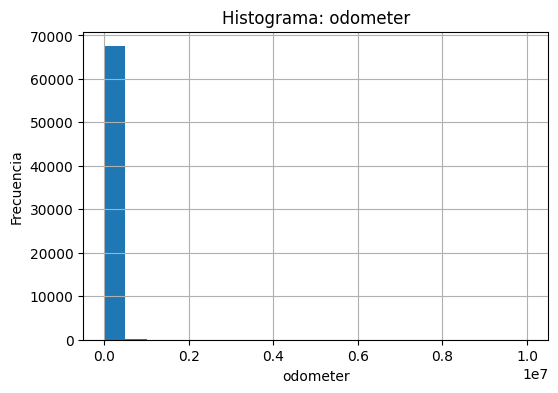

In [132]:
def hist(df, col, bins=20):
    plt.figure(figsize=(6,4))
    df_cleaned_filtrado[col].hist(bins=bins)
    plt.title(f'Histograma: {col}')
    plt.xlabel(col); plt.ylabel('Frecuencia')
    plt.show()

for col in ['price','year','odometer']:
    hist(df, col)


Precio: Observamos que la curva preseenta una kurtosis hacia la izquierda lo que nos indica que existen una gran cantidad de outliers todavia en el set de datos

Año no indica que la mayoria de los vechiuclos son nuevos

Odometro nos indica que la mayoria de los vehiculos tiene alto kilometraje

Aqui vemos los rangos intercuartiles, podemos ver que los whiskers son bastante largos

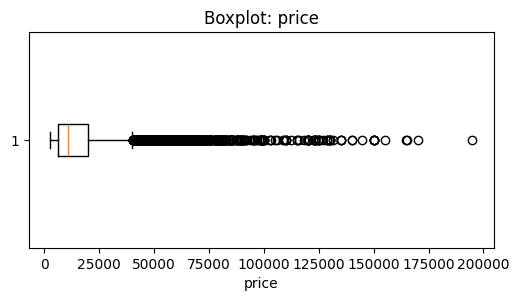

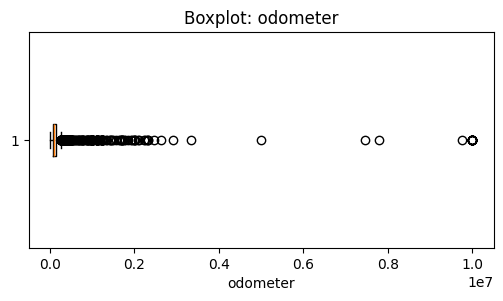

In [133]:
def box(df, col):
    plt.figure(figsize=(6,2.8))
    plt.boxplot(df_cleaned_filtrado[col].dropna(), vert=False)
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

for col in ['price','odometer']:
    box(df_cleaned_filtrado, col)


Ahora observamos las relaciones de bivariables

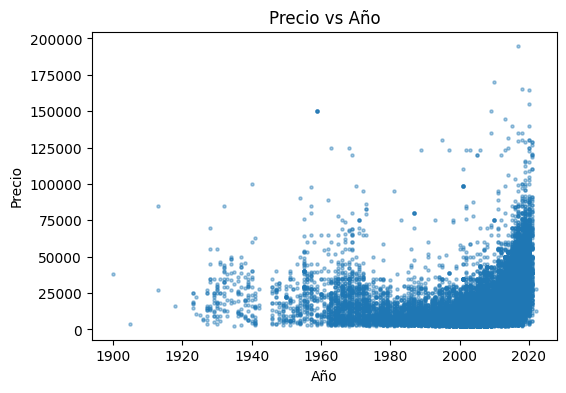

In [134]:
#PrecioVsAño

plt.figure(figsize=(6,4))
plt.scatter(df_cleaned_filtrado['year'], df_cleaned_filtrado['price'], s=5, alpha=0.4)
plt.title('Precio vs Año')
plt.xlabel('Año'); plt.ylabel('Precio')
plt.show()

Aqui podemos ver una tendencia clara entre en precio y el año, con algunos outrliers que pueden representar vehiculos de coleccion o altamente buscados

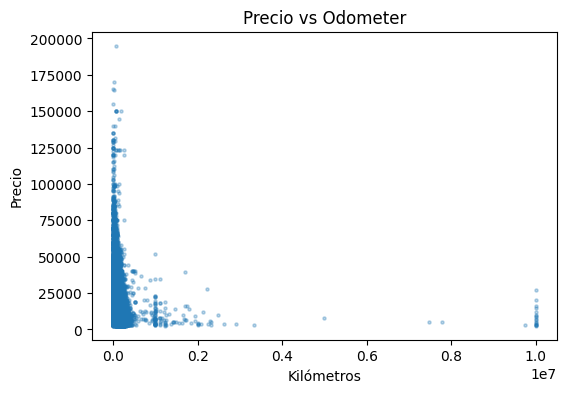

In [135]:
#PrecioVsKilometraje

plt.figure(figsize=(6,4))
plt.scatter(df_cleaned_filtrado['odometer'], df_cleaned_filtrado['price'], s=5, alpha=0.3)
plt.title('Precio vs Odometer')
plt.xlabel('Kilómetros'); plt.ylabel('Precio')
plt.show()

Aqui podemos ver que entre menor es el kilometraje mayor es el precio, esto es logico ya que se espera que si un vehiculo tiene menor tendra mayor vida util en un furuto

In [136]:
#Correlacion entre variables numericas

df_cleaned_filtrado[num_cols].corr()


,price,year,odometer
price,1.000000,0.247505,-0.168090
year,0.247505,1.000000,-0.124116
odometer,-0.168090,-0.124116,1.000000


Ahora realizamos un analisis por grupos

In [137]:
#Precio medio por frabricante

top_makers = df_cleaned_filtrado['manufacturer'].value_counts().head(10).index
maker_stats = (df_cleaned_filtrado[df_cleaned_filtrado['manufacturer'].isin(top_makers)]
               .groupby('manufacturer')['price']
               .agg(['count','mean','median','std'])
               .sort_values('mean', ascending=False))
maker_stats

,count,mean,median,std
manufacturer,,,,
ram,2396,25088.222454,23000.0,14571.133272
gmc,2593,19749.425376,15995.0,14120.211959
ford,12893,17578.246335,13591.0,13760.135426
jeep,2831,16486.248675,14500.0,11231.273148
bmw,2242,16481.258252,13000.0,12048.730832
chevrolet,9694,16462.742315,12900.0,13145.291746
toyota,6260,13853.517093,10000.0,10478.828839
dodge,1998,13106.333834,8995.0,11916.645890
nissan,3423,11031.901548,8950.0,7282.626779


Se supone que los fabricantes de vehiculos mas "Premium deberian tener medias mas altas", sin emabrgo vemos que los vehiculos que tienen medias mas altas son las marcas americanas

In [138]:
#Precio por tipo de combustible, transmision y traccion

for c in ['fuel','transmission','drive']:
    g = df_cleaned_filtrado.groupby(c)['price'].agg(['count','mean','median'])
    print(f'\n== {c} ==\n', g.sort_values('mean', ascending=False).head(10))



== fuel ==
           count          mean   median
fuel                                  
diesel     4243  28223.914212  24990.0
electric    113  22970.477876  12999.0
other       162  21955.567901  18225.0
gas       62204  14255.475002  10900.0
hybrid      916  11472.528384   8995.0

== transmission ==
               count          mean   median
transmission                              
other           327  17081.954128  11500.0
automatic     62314  15235.829733  11500.0
manual         4997  13642.514309   9450.0

== drive ==
        count          mean   median
drive                              
4wd    28167  18764.916072  14995.0
rwd    15389  16591.761258  13000.0
fwd    24082   9936.090524   7957.0


Aqui podemos ver que los vehiculis de diesel y electricos son mas costosos que los de gas, tambien que los vehiculos automaticos son mas costoso que los manuales y que loss vehiculos mas caros son camionteas fon 4WD

In [139]:
#Año y kilometraje por fabricante

cond_stats = (df_cleaned_filtrado[df_cleaned_filtrado['manufacturer'].isin(top_makers)]
              .groupby('manufacturer')[['year','odometer']]
              .mean().sort_values('year', ascending=False))
cond_stats.head(10)


,year,odometer
manufacturer,,
nissan,2012.008472,103670.542507
ram,2011.303005,124977.169032
bmw,2010.588760,95486.171722
honda,2010.310842,121134.999085
toyota,2009.543450,127213.558626
gmc,2009.410721,131863.075588
jeep,2009.304839,106836.199929
dodge,2008.399900,111197.102603
ford,2007.933452,121170.511518


In [140]:
#Vehiculos por estado

state_stats = df_cleaned_filtrado.groupby('state')['price'].agg(['count','mean','median']).sort_values('mean', ascending=False)
state_stats.head(15)


,count,mean,median
state,,,
ak,422,23133.680095,18950.0
ut,215,20703.544186,17500.0
wy,131,20118.160305,15999.0
hi,346,19495.060694,17794.0
nd,179,19058.765363,16990.0
nv,883,19033.244621,17699.0
sd,285,18516.817544,13000.0
mt,726,18159.918733,13999.5
tn,1993,18147.106874,15942.0


Estados como Alaska, Utah y Wyoming tienen los precios medios de los vehiculos mas altos, esto puede ser debido aque como son estados con muchas montañas, los consumidores pueden prefereir vehiculos 4WD y de algun modelo nacional como RAM, FORD O GMC que tienen los precios promedios mas altos

In [141]:
# 1) Variables numéricas escalables
X_num = df_cleaned_filtrado[['year','odometer']].copy()

# 2) Variables categóricas high-cardinality
hi_card = ['model']   # model suele tener muchísimas categorías
lo_card = ['manufacturer','cylinders','fuel','transmission','drive','size','paint_color','state']

# 3) Codificación sugerida (más adelante, ya en ML):
# - Lo-card: One-Hot Encoding
# - Hi-card: target encoding / hashing / frequency encoding
freq_model = df_cleaned_filtrado['model'].value_counts().to_dict()
df_cleaned_filtrado['model_freq'] = df_cleaned_filtrado['model'].map(freq_model)

# 4) Interacciones numéricas simples (opcionales)
df_cleaned_filtrado['age'] = df_cleaned_filtrado['year'].max() - df_cleaned_filtrado['year']  # edad del vehículo
df_cleaned_filtrado[['price','year','age','odometer','model_freq']].head()


C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\2342481348.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtrado['model_freq'] = df_cleaned_filtrado['model'].map(freq_model)
C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\2342481348.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtrado['age'] = df_cleaned_filtrado['year'].max() - df_cleaned_filtrado['year']  # edad del vehículo


,price,year,age,odometer,model_freq
31,15000,2013,9,128000,95
55,19900,2004,18,88000,140
59,14000,2012,10,95000,210
65,22500,2001,21,144700,27
73,15000,2017,5,90000,1


In [142]:
df_cleaned_filtrado.info()


<class 'pandas.core.frame.DataFrame'>
Index: 67638 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         67638 non-null  int64 
 1   year          67638 non-null  int64 
 2   manufacturer  67638 non-null  object
 3   model         67638 non-null  object
 4   cylinders     67638 non-null  object
 5   fuel          67638 non-null  object
 6   odometer      67638 non-null  int64 
 7   transmission  67638 non-null  object
 8   drive         67638 non-null  object
 9   size          67638 non-null  object
 10  paint_color   67638 non-null  object
 11  state         67638 non-null  object
 12  model_freq    67638 non-null  int64 
 13  age           67638 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 7.7+ MB


In [143]:
#Definir las variables objetivo y predictoras

target = 'price'
features = [
    'year',
    'manufacturer',
    'cylinders',
    'fuel',
    'odometer',
    'transmission',
    'drive',
    'size',
    'paint_color',
    'state'
    'model_freq',
    'age',
    
]


In [144]:
#Identificacion de columnas categoricas y aplicacion de Label Encoding

categorical_cols = [
    'manufacturer',
    'cylinders',
    'fuel',
    'transmission',
    'drive',
    'size',
    'paint_color',
    'state',
    'model_freq'
]
le = LabelEncoder()
for features in categorical_cols:
    df_cleaned_filtrado[features] = le.fit_transform(df_cleaned_filtrado[features])

X = df_cleaned_filtrado[features]
y = df_cleaned_filtrado[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\829878552.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtrado[features] = le.fit_transform(df_cleaned_filtrado[features])
C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\829878552.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtrado[features] = le.fit_transform(df_cleaned_filtrado[features])
C:\Users\Juan\AppData\Local\Temp\ipykernel_20224\829878552.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [145]:
print(f"Type of X_test: {type(X_test)}")
# If it prints <class 'pandas.core.series.Series'>, it's the problem.

# Check the shape of the data being passed
# If it prints (n,) it is 1D (problematic)
# If it prints (n, m) or (n, 1) it is 2D (correct)
print(f"Shape of X_test: {X_test.shape}") 

Type of X_test: <class 'pandas.core.series.Series'>
Shape of X_test: (13528,)


In [146]:
X_test_fixed_pd = X_test.to_frame()
print(f"Shape of X_test_fixed_pd: {X_test_fixed_pd.shape}")

X_train_fixed = X_train.to_frame()
print(f"Shape of X_train_fixed: {X_train_fixed.shape}")

Shape of X_test_fixed_pd: (13528, 1)
Shape of X_train_fixed: (54110, 1)


In [147]:
#Implementacion RANDOM FOREST REGRESSOR

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_fixed, y_train)
y_pred_rf = rf_reg.predict(X_test_fixed_pd)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")


Random Forest RMSE: 11588.24


In [148]:
#Implementacion XGBOOST REGRESSOR
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_reg.fit(X_train_fixed, y_train)
y_pred_xgb = xgb_reg.predict(X_test_fixed_pd)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb:.2f}")


XGBoost RMSE: 11635.99


In [149]:
# Comparar los resultados finales
print(f'RMSE de Random Forest: {rmse_rf:.2f}')
print(f'RMSE de XGBoost: {rmse_xgb:.2f}')

if rmse_xgb < rmse_rf:
    print('XGBoost tuvo un mejor rendimiento.')
elif rmse_rf < rmse_xgb:
    print('Random Forest tuvo un mejor rendimiento.')
else:
    print('Ambos modelos tienen un rendimiento similar.')


RMSE de Random Forest: 11588.24
RMSE de XGBoost: 11635.99
Random Forest tuvo un mejor rendimiento.
